# Modelling of a growth units using Python, R and L-Py

In this second notebook, the same modelling scenario is presented except that now growth functions and parameters are defined using the R language. These objects can still be accessed by the different cells of the notebooks. And thus the simulation is done with R functions.

The extension RPy2 makes it possible to communicate between Python and R.

In [7]:
import pgljupyter
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


# Growth 

Growth of organs is simulated using a logistic function $\frac{L}{1 + \exp{-\frac{t-tip}{b}}}$

In [8]:
%%R -o growth_logistic

growth_logistic = function(ttime, finalsize, tip, b){
    return (finalsize / (1 + exp(-(ttime-tip)/b )));
}


### Definition of growth parameters for the different organs along the axis

In [9]:
%%R -i growth_logistic -o LLeaf,LIn,leaf_size,internode_size
LLeaf = c(4.9, 5.5, 6., 6.9, 7.5, 8.7, 9.2, 9.6, 7.)
tipLeaf = c(0.0, 1.8, 3.7, 5.5, 7.1, 8.8, 10.4, 11.9, 13.4)
bLeaf = 1.7 

LIn = c(1., 1.2, 1.8, 2.7, 3.5, 4.2, 4.2, 3.5, 1.7)
tipIn = c(0.2, 1.9, 3.5, 5.1, 6.7, 8.4, 10.0, 11.6, 13.3)
bIn = 1.3

leaf_size = function(i, t) { return(growth_logistic(t, LLeaf[i], tipLeaf[i], bLeaf)); }
internode_size = function(i, t) { return (growth_logistic(t, LIn[i], tipIn[i], bIn)); }

Plot of final size of leaves and internodes along the main axis

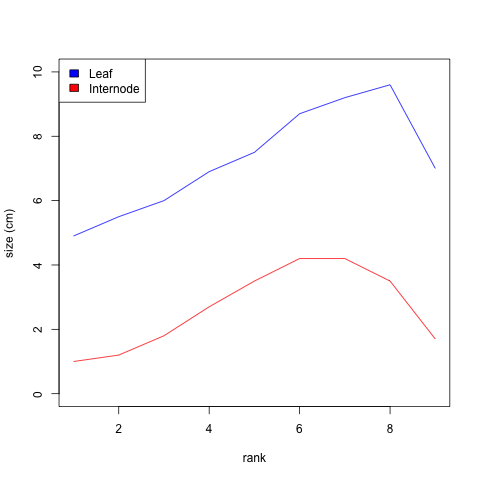

In [10]:
%%R --input LLeaf,LIn 
x = 1:length(LLeaf)
plot(x,LLeaf,ylim=c(0,10),type="l", col="blue", ylab="size (cm)", xlab='rank')
lines(x, LIn, col="red")
legend("topleft",c("Leaf","Internode"),fill=c("blue","red"))

# The Architectural model defined using Lsystem rules

Rules are based on parameters and functions defined on previous R cells. 

In [11]:
%%lpy -a True -u dm -w 4 -s 600,400
nbMetamers = len(LLeaf)
maxTime, dt = 25, 0.1
Axiom: 
    nproduce _(0.3)@Gc SetColor(Material((1,15,1),10,specular=(0,0,0),shininess=0.2))
    for i in range(1,int(nbMetamers)+1):  nproduce I(i,0)/(137)[[^(40)L(i,0)]]
    nproduce I(i,0) @O

derivation length: int(maxTime//dt)
production:
I(i,t) --> I(i,t+dt)
L(i,t) --> L(i,t+dt)

interpretation:
I(i,t) --> F(internode_size(i,t)[0])
L(i,t) :
    l = leaf_size(i,t)[0]
    nproduce SetColor(2)_(0.1)^(t)F(l/6)[+(90)/(-30)~l(l/2)][-(90)/(30)~l(l/2)]F(l/6)[+(60)/(-15)~l(l/2)][-(60)/(15)~l(l/2)]F(l/6)^(20)~l(l/2)

LsystemWidget(animate=True, derivationLength=250, is_magic=True, scene={'data': b'x\xda\xad\x99\x0fP\x14\xd7\x…